## Using CNN for the 2nd model with Sigmoid activation function and use of higher number of layers
### Better Model : Plotting the accuracy and the cross entropy through Tensorboard¶
https://stackoverflow.com/questions/40146428/show-training-and-validation-accuracy-in-tensorflow-using-same-graph?noredirect=1&lq=1
+ Why Mini-batch of 100
    + That is Because we want to run it on GPU, distributed computation is possible to work in case of batch processing
    + with 1 image, we might get to the local minima, but that will be windy, it is more stable to do this with 100 images at one time, which is way more stable as we get an idea of the gradient by going through 100 images
    + Let's go deep, with Deep Neural Networks
    + We use a 5 Layer NN as next and change the activation function to a RELU function, which is a better option than the others
    + Why it is doing well, is because Sigmoid is flat on some regions which makes its gradient non-increasing which is one of the reasons for RELU doing better than the sigmoid activation function, and this problem is enhanced with large number of layers, and this caused vanishing gradient problem where the errors become very small.
    + It is always better to start fast and then decay the learning rate to get a better curve
    + Use regularization as well such as dropout so that we do not overfit, this could be seen through the disconnect between Test and training loss, we do not use dropout with the test set, dropout is pretty simple. It rolls the dice and selects 25% of the neurons and takes them out. It is a way of freezing the neurons for one given iteration
    + In the neural network, we need to contstrain the degrees of freedom to force the NN to create categories of your data. So best is always need a lots and lots of data and lot of processsing
    + The above cannot reach more than 98% as we are destroying the shape information

In [2]:
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.set_random_seed(0)
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
X=tf.placeholder(tf.float32, [None, 784]) 
Y_=tf.placeholder(tf.float32, [None, 10])


# All 4 Hidden layers, going from top to bottom. First is 
K=200
L=100
M=60
N=30

W1=tf.Variable(tf.truncated_normal([28*28, K], stddev=0.1))
B1=tf.Variable(tf.zeros([K]))

W2=tf.Variable(tf.truncated_normal([K,L], stddev=0.1))
B2=tf.Variable(tf.zeros([L]))

W3=tf.Variable(tf.truncated_normal([L,M], stddev=0.1))
B3=tf.Variable(tf.zeros([M]))

W4=tf.Variable(tf.truncated_normal([M,N], stddev=0.1))
B4=tf.Variable(tf.zeros([N]))

W5=tf.Variable(tf.truncated_normal([N,10], stddev=0.1))
B5=tf.Variable(tf.zeros([10]))

#Model
XX=tf.reshape(X, [-1, 28*28])
Y1=tf.nn.sigmoid(tf.matmul(XX, W1)+B1)
Y2=tf.nn.sigmoid(tf.matmul(Y1, W2)+B2)
Y3=tf.nn.sigmoid(tf.matmul(Y2, W3)+B3)
Y4=tf.nn.sigmoid(tf.matmul(Y3, W4)+B4)

YLogits=tf.matmul(Y4,W5)+B5
Y= tf.nn.softmax(YLogits)

In [18]:
#loss function
#cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=YLogits, labels=Y_)
cross_entropy= tf.reduce_mean(cross_entropy)*100

#correct answers
is_correct=tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy=tf.reduce_mean(tf.cast(is_correct, tf.float32))

#optimizer=tf.train.GradientDescentOptimizer(0.003)
train_step=tf.train.AdamOptimizer(0.003).minimize(cross_entropy)

# Matplotlib visualization
#allweights=tf.reshape(W, [-1])
#allbiases=tf.reshape(W,[-1])
#I=tensorflowvisu.tf_format_mnist_images(X, Y, Y_) #assembles all 10x10 images by default
#It=tensorflowvisu.tf_format_mnist_images(X,Y,Y_,1000, lines=25) #1000 images on 25 lines
#datavis=tensorflowvisu.MnistDataVis()

# Run TF session
init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

train_accuracy_=[]
train_loss=[]
test_accuracy_=[]
test_loss=[]

#Train the model 100 images at a time by the function below
def training_Step(i, update_test_data, update_train_data):
        batch_X, batch_Y = mnist.train.next_batch(100)
        
        # Backpropagation training step
        train_data = {X:batch_X, Y_:batch_Y}
        sess.run(train_step, feed_dict=train_data)
        
        #Compute training values for visualization
        if update_train_data:
            a, c = sess.run([accuracy, cross_entropy], feed_dict=train_data)
            #a, c, im, w, b = sess.run([accuracy, cross_entropy, I, allweights, allbiases], feed_dict=train_data)
            #datavis.append_training_curves_data(i, a, c)
            #datavis.append_data_histograms(i, w, b)
            #datavis.update_image1(im)
            if i%100==0:
                train_accuracy_.append(a*100.0)
                train_loss.append(c)
                print("Iterationg: {}, Train Acuuracy: {}, Train Loss: {}".format(i, a*100, c))
        
        #On the test data values for visualization
        if update_test_data:
            test_data={X:mnist.test.images, Y_:mnist.test.labels}
            a, c = sess.run([accuracy, cross_entropy], feed_dict=test_data)
            #a, c, im = sess.run([accuracy, cross_entropy, It], feed_dict=test_data)
            #datavis.append_test_curves_data(i, a, c)
            #datavis.update_image1(im)
            if i%100==0:
                test_accuracy_.append(a*100.0)
                test_loss.append(c)
                print("Iterationg: {}, Test Acuuracy: {}, Test Loss: {}".format(i, a*100, c))
        
        
for i in range(10000+1): training_Step(i,True, True)

Iterationg: 0, Train Acuuracy: 10.000000149011612, Train Loss: 232.74697875976562
Iterationg: 0, Test Acuuracy: 10.320000350475311, Test Loss: 231.6660614013672
Iterationg: 100, Train Acuuracy: 37.00000047683716, Train Loss: 148.5665283203125
Iterationg: 100, Test Acuuracy: 43.549999594688416, Test Loss: 147.7111053466797
Iterationg: 200, Train Acuuracy: 79.00000214576721, Train Loss: 88.53717041015625
Iterationg: 200, Test Acuuracy: 80.04000186920166, Test Loss: 77.44490814208984
Iterationg: 300, Train Acuuracy: 82.99999833106995, Train Loss: 55.87291717529297
Iterationg: 300, Test Acuuracy: 86.51000261306763, Test Loss: 50.085906982421875
Iterationg: 400, Train Acuuracy: 93.99999976158142, Train Loss: 31.06934356689453
Iterationg: 400, Test Acuuracy: 91.430002450943, Test Loss: 37.18209457397461
Iterationg: 500, Train Acuuracy: 91.00000262260437, Train Loss: 24.648283004760742
Iterationg: 500, Test Acuuracy: 92.97000169754028, Test Loss: 30.002256393432617
Iterationg: 600, Train Acuu

Iterationg: 5100, Train Acuuracy: 99.00000095367432, Train Loss: 1.5225661993026733
Iterationg: 5100, Test Acuuracy: 97.26999998092651, Test Loss: 10.73205280303955
Iterationg: 5200, Train Acuuracy: 100.0, Train Loss: 0.2241242378950119
Iterationg: 5200, Test Acuuracy: 97.29999899864197, Test Loss: 11.031060218811035
Iterationg: 5300, Train Acuuracy: 99.00000095367432, Train Loss: 3.489494800567627
Iterationg: 5300, Test Acuuracy: 96.96000218391418, Test Loss: 12.316733360290527
Iterationg: 5400, Train Acuuracy: 99.00000095367432, Train Loss: 4.147314071655273
Iterationg: 5400, Test Acuuracy: 97.2000002861023, Test Loss: 11.36971664428711
Iterationg: 5500, Train Acuuracy: 100.0, Train Loss: 0.559062123298645
Iterationg: 5500, Test Acuuracy: 97.15999960899353, Test Loss: 11.367793083190918
Iterationg: 5600, Train Acuuracy: 100.0, Train Loss: 0.16894733905792236
Iterationg: 5600, Test Acuuracy: 96.92000150680542, Test Loss: 12.698563575744629
Iterationg: 5700, Train Acuuracy: 100.0, Trai

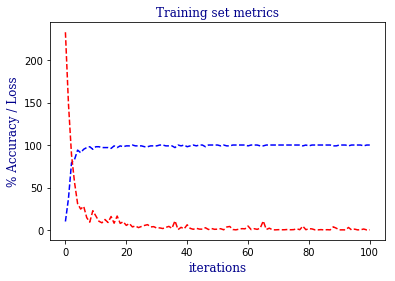

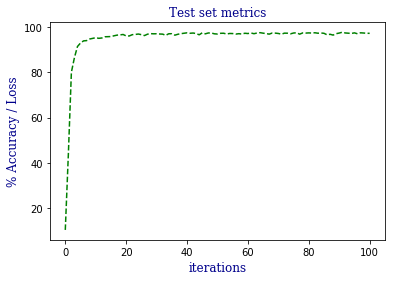

Maximum Training set accuracy: 100.0
Maximum Test set accuracy: 97.7400004863739


In [19]:
# Plot the Training and test accuracies and losses

#plotting using Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font={
    'family':'serif',
    'color' :'darkblue',
    'weight':'normal',
    'size':12,
}

x_vals=[i for i in range(0, 10000, 100)]

plt.figure(1)
plt.title('Training set metrics', fontdict=font)
plt.xlabel('iterations',fontdict=font)
plt.ylabel('% Accuracy / Loss',fontdict=font)
plt.plot(train_accuracy_, 'b--', train_loss, 'r--')
plt.show()

plt.figure(2)
plt.title('Test set metrics', fontdict=font)
plt.xlabel('iterations',fontdict=font)
plt.ylabel('% Accuracy / Loss',fontdict=font)
plt.plot(test_accuracy_, 'g--')
plt.show()

print("Maximum Training set accuracy: {}".format(max(train_accuracy_)))
print("Maximum Test set accuracy: {}".format(max(test_accuracy_)))

### Discussion of Results with the use of Neural Networks

#### Accuracy metrics
+ With one Layer,  Accuracy = 92%
+ With two Layers, Accuracy = 97% , Used GradientDescentOptimizer here
+ With 5 Layers Used, Accuracy = 97.8%, softmax_cross_entropy_with_logits_v2 , and used the AdamOptimizer here, GradientDescent Optimizer does not work here, why ?? Because of too many layers and the vanishing gradient problem
